**Predict CO2 Emissions in Rwanda**

**objective:** The objective of this challenge is to create machine learning models that use open-source emissions data (from Sentinel-5P satellite observations) to predict carbon emissions.

**Sentinel-5P satellite observations**: Sentinel-5 Precursor is an Earth observation satellite developed by ESA as part of the Copernicus Programme to close the gap in continuity of observations between Envisat and Sentinel-5.
Approximately 497 unique locations were selected from multiple areas in Rwanda, with a distribution around farm lands, cities and power plants. The data for this competition is split by time; the years 2019 - 2021 are included in the training data, and your task is to predict the CO2 emissions data for 2022 through November

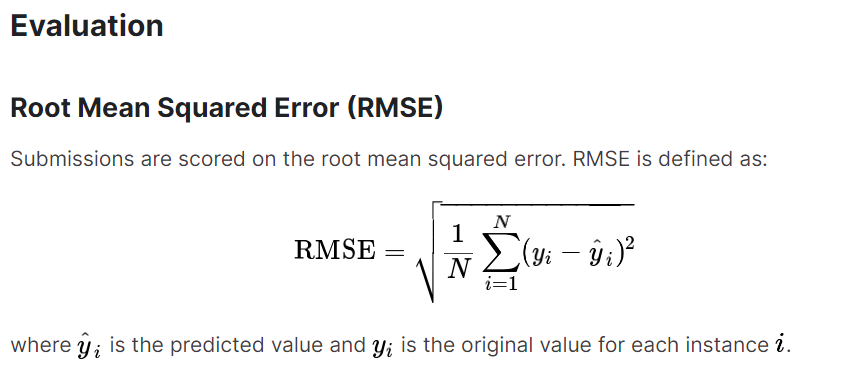


**Number of rows:** 79023(79K)

**Number of columns:**76

**Target Variable:** Emission

**Other variable:** Sulphur Dioxide, Carbon Monoxide, Nitrogen Dioxide, Formaldehyde, UV Aerosol Index, Ozone Cloud
Each feature (Sulphur Dioxide, Carbon Monoxide, etc) contain sub features such as column_number_density which is the vertical column density at ground level, calculated using the DOAS technique

**What's DOAS Techchnique?**

The Differential Optical Absorption Spectroscopy (DOAS) technique is a remote sensing method used for measuring trace gases in the Earth's atmosphere. It is particularly valuable for studying pollutants and greenhouse gases.


# Importing the libraries


In [45]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew

In [46]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
url='https://www.kaggle.com/competitions/playground-series-s3e20'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nitinkumarchavan
Your Kaggle Key: ··········


100%|██████████| 48.9M/48.9M [00:00<00:00, 56.5MB/s]



Extracting archive ./playground-series-s3e20/playground-series-s3e20.zip to ./playground-series-s3e20


In [47]:
train=pd.read_csv('/content/playground-series-s3e20/train.csv')
test=pd.read_csv('/content/playground-series-s3e20/test.csv')
submission=pd.read_csv('/content/playground-series-s3e20/sample_submission.csv')

In [48]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.00003,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.

In [49]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.561522,829937.000000,-100.113785,33.696957,-133.047562,33.779572,0.112175,2.374888,0.269846,227.193100,0.485340,-100.113785,33.696957,-133.047562,33.779572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.485129,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,-140.529848,28.896124,0.000157,0.037641,1688.656342,2814.309683,829652.957598,26.072167,25.189549,-142.612636,28.318923,0.000048,1.117653e-05,0.000037,0.000093,7311.869141,-1.416309,0.036769,829736.125000,76.239196,15.600607,-140.529848,28.896124,0.000123,0.957096,0.000058,0.000000,28.896124,-140.529848,15.600607,76.239196,-0.823662,829753.051343,-0.009998,34.745542,-139.171039,30.405075,0.112643,2.537305,0.290184,228.489219,0.515679,-0.009998,34.745542,-139.171039,30.405075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711262,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,-136.908976,30.054682,0.000053,0.037795,2629.692089,3233.654973,829589.971617,14.881259,40.833582,-143.949340,26.760219,0.000055,1.679787e-05,0.000038,0.000109,8

In [50]:
train = train.drop("ID_LAT_LON_YEAR_WEEK", axis=1)

In [51]:
print('The dimension of the train  dataset is:', train.shape)
print('The dimension of the test  dataset is:', test.shape)
print('The dimension of the  dataset is:', submission.shape)

The dimension of the train  dataset is: (79023, 75)
The dimension of the test  dataset is: (24353, 75)
The dimension of the  dataset is: (24353, 2)


#**Data Preprocessing:**

In [52]:
# Train statistical summary
train.describe(include = 'all')

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,76901.000000,76901.000000,76901.000000,76901.000000,76901.000000,76901.000000,76901.000000,76901.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,71746.000000,71746.000000,71746.000000,71746.000000,71746.000000,71746.000000,71746.000000,71746.000000,78484.000000,78484.000000,78484.000000,78484.000000,78484.000000,78484.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,0.000015,0.033158,2113.906233,2821.590722,829938.633762,-7.331051,37.846794,-86.049580,27.767024,0.000044,0.000012,0.000032,0.000097,8922.568995,-1.812155,0.097008,829994.224471,-15.937696,36.852637,-84.260082,28.316388,0.000127,1.254134,0.000084,0.228801,27.887813,-84.605844,40.478057,-9.396089,-1.342787,829974.542096,-12.739997,39.962875,-86.548895,28.052553,0.117343,2.609890,0.310802,228.625917,0.569107,-13.1087

**Missing Value interms of Percentage**

In [53]:
# Calculating Missing Value interms of Percentage

missing_value_percentage = (train.isnull().sum() / len(train))*100
missing_value_percentage.sort_values(ascending=False)

UvAerosolLayerHeight_aerosol_height                         99.444466
UvAerosolLayerHeight_sensor_azimuth_angle                   99.444466
UvAerosolLayerHeight_aerosol_pressure                       99.444466
UvAerosolLayerHeight_aerosol_optical_depth                  99.444466
UvAerosolLayerHeight_sensor_zenith_angle                    99.444466
UvAerosolLayerHeight_solar_zenith_angle                     99.444466
UvAerosolLayerHeight_solar_azimuth_angle                    99.444466
NitrogenDioxide_solar_zenith_angle                          23.183124
NitrogenDioxide_absorbing_aerosol_index                     23.183124
NitrogenDioxide_tropopause_pressure                         23.183124
NitrogenDioxide_NO2_slant_column_number_density             23.183124
NitrogenDioxide_stratospheric_NO2_column_number_density     23.183124
NitrogenDioxide_tropospheric_NO2_column_number_density      23.183124
NitrogenDioxide_NO2_column_number_density                   23.183124
NitrogenDioxide_sens

In [54]:
# Dropping those column having missing value percentage greater than 60%
columns_to_drop = missing_value_percentage[missing_value_percentage > 60].index
train = train.drop(columns=columns_to_drop)

In [55]:
train.shape

(79023, 68)

In [56]:
from sklearn.impute import KNNImputer

# Select columns to impute using KNN
columns_to_knn = missing_value_percentage[(missing_value_percentage > 10) & (missing_value_percentage < 60)].index

# KNN Imputation for selected columns
Knn_impu = KNNImputer(n_neighbors=5)
train[columns_to_knn] = Knn_impu.fit_transform(train[columns_to_knn])

# Now you can use the 'columns_to_knn' variable if needed
print(columns_to_knn)


Index(['SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slant_column_number_density',
       'NitrogenDioxide_tropopause_pressure',
       'NitrogenDioxide_absorbing_aerosol_index',
       'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude',
       'NitrogenDioxide_sensor_azimuth_angle',
       'NitrogenDioxide_sensor_zenith_angle',
       'NitrogenDioxide_solar_azimuth_angle',
       'Nitrogen

In [57]:
# Mean Imputation for those column having missing value percentage  and less than 10%
columns_to_mean=missing_value_percentage[ (missing_value_percentage <10) & (missing_value_percentage >0)].index
columns_mean = train[columns_to_mean].mean()
train[columns_to_mean] = train[columns_to_mean].fillna(columns_mean)

In [58]:
train.isnull().sum()

latitude                                                    0
longitude                                                   0
year                                                        0
week_no                                                     0
SulphurDioxide_SO2_column_number_density                    0
SulphurDioxide_SO2_column_number_density_amf                0
SulphurDioxide_SO2_slant_column_number_density              0
SulphurDioxide_cloud_fraction                               0
SulphurDioxide_sensor_azimuth_angle                         0
SulphurDioxide_sensor_zenith_angle                          0
SulphurDioxide_solar_azimuth_angle                          0
SulphurDioxide_solar_zenith_angle                           0
SulphurDioxide_SO2_column_number_density_15km               0
CarbonMonoxide_CO_column_number_density                     0
CarbonMonoxide_H2O_column_number_density                    0
CarbonMonoxide_cloud_height                                 0
CarbonMo

**Outliers**

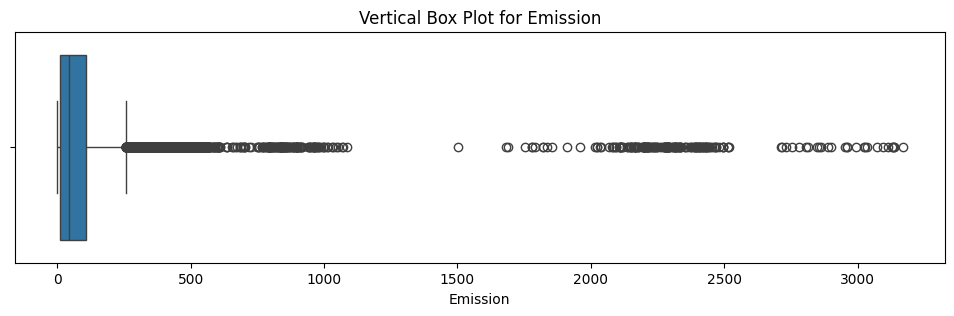

In [59]:
# Plot vertical box plot
plt.figure(figsize=(12,3))
sns.boxplot(x=train['emission'])
plt.title('Vertical Box Plot for Emission')
plt.xlabel('Emission')
plt.show()

**Removing outliers by IQR**

In [60]:
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = train['emission'].quantile(0.25)
Q3 = train['emission'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [61]:
# Calculate the total number of data points before removing outliers
total_data_points_before = len(train)

# Calculate the number of outliers (points outside the lower and upper bounds)
outliers = train[(train['emission'] < lower_bound) | (train['emission'] > upper_bound)]

# Calculate the total number of outliers
total_outliers = len(outliers)

# Calculate the percentage of outliers
percentage_outliers = (total_outliers / total_data_points_before) * 100

# Print the results
print("Total Data Points Before:", total_data_points_before)
print("Total Outliers:", total_outliers)
print("Percentage of Outliers:", percentage_outliers)


Total Data Points Before: 79023
Total Outliers: 4275
Percentage of Outliers: 5.409817394935652


In [62]:
# Remove outliers from the 'emission' column
train = train[(train['emission'] >= lower_bound) & (train['emission'] <= upper_bound)]

In [63]:
train.shape

(74748, 68)

#**Exploratory Data Analysis (EDA)**

**Emission Values over Weeks**


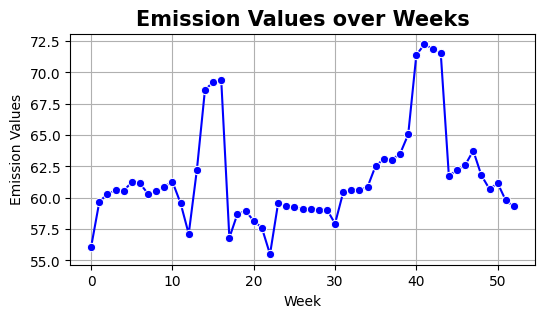

In [70]:
# Emission Values over Weeks
x = train['week_no']
y = train['emission']

# Plotting
plt.figure(figsize=(6,3))
sns.lineplot(x=x, y=y, marker='o', color='blue', ci=None)
plt.title('Emission Values over Weeks',fontsize = 15, fontweight = 'bold')
plt.xlabel('Week')
plt.ylabel('Emission Values')
plt.grid(True)
plt.show()

**Data Points and Trends:** The red dots represent the emission values for each week. The line connecting these dots shows the trend in emission values over time. There are two prominent peaks in emission values around weeks 10 and 40, indicating times when emissions were at their highest. Conversely, the lowest points occur between these two peaks and after week 40, indicating times when emissions were at their lowest.

**Interpretation:**This information could be useful for identifying patterns or trends in the data, which could in turn inform strategies for reducing emissions.

**Emission By Month**

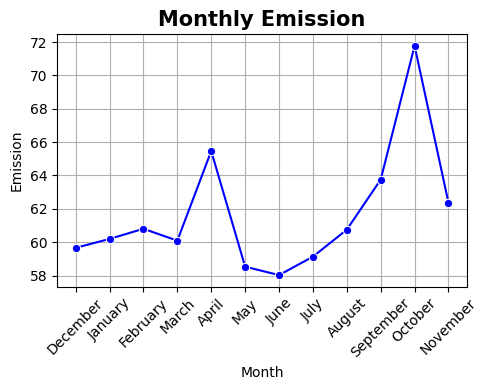

In [71]:
# Combine 'year' and 'week_no' to create a datetime column
train['date'] = train['year'].astype(str) + '-W' + train['week_no'].astype(str) + '-1'
train['date'] = pd.to_datetime(train['date'], format='%Y-W%U-%w')

# Extract month name from the 'date' column
train['month_name'] = train['date'].dt.strftime('%B')

# Plotting
plt.figure(figsize=(5,4))
sns.lineplot(x='month_name', y='emission',color='blue', data=train, marker='o',ci=None)
plt.title('Monthly Emission',fontsize = 15, fontweight = 'bold')
plt.xlabel('Month')
plt.ylabel('Emission')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()

This above image is a line graph that shows how much emission (like pollution) is produced each month. The blue dots are the emission amounts for each month. The line connecting the dots shows how the emission changes over time. The emissions are lowest in june and highest in october. This means that less pollution was produced in February and more pollution was produced in November.

**Emission Trend Over Year**

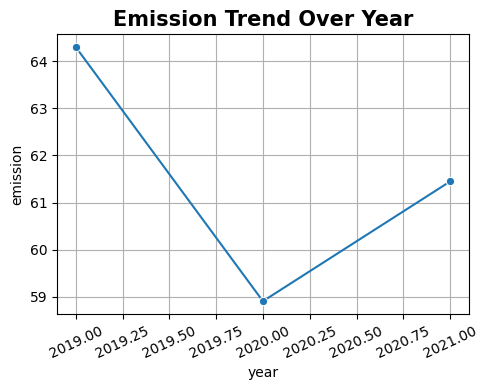

In [72]:
# Emission Trend Over Year
# Plotting
plt.figure(figsize=(5,4))
sns.lineplot(data = train, x = 'year', y = 'emission',  marker='o',ci=None)
plt.title('Emission Trend Over Year', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 25)
plt.grid(True)
plt.tight_layout()
plt.show()

The line connecting the data points shows the trend in emission values over the years. The graph shows a clear pattern: emission values decrease from 2019 to 2020, reaching their lowest point in early 2020 at around 59. From 2020, emissions increase again, reaching approximately 61 by early 2021. This could suggest a pattern in the emissions, or it could reflect the impact of specific events or activities that took place during those years such as COVID-19.

**Skweness Of Data**

What is Skewed Data?

A data is called as skewed when curve appears distorted either to the left or to the right, in a statistical distribution.I.e one tail is longer than the other.

**Types:**

Positive value means the distribution is skewed to the right.

Negative value means the distribution is skewed to the left.

0 means perfect normal distribution. The bell shaped curve.

**Such data can be handled by following ways:**

Log Transform

Box Cox Transform

Square Root Transform

In [64]:
old_skew = train.skew().sort_values(ascending=False)
old_skew

SulphurDioxide_SO2_column_number_density_15km               3.054324
SulphurDioxide_SO2_slant_column_number_density              2.824861
SulphurDioxide_SO2_column_number_density                    2.630290
Cloud_cloud_optical_depth                                   2.195899
NitrogenDioxide_cloud_fraction                              1.926930
CarbonMonoxide_H2O_column_number_density                    1.425495
NitrogenDioxide_tropospheric_NO2_column_number_density      1.273831
NitrogenDioxide_NO2_column_number_density                   1.170695
emission                                                    1.092493
Ozone_O3_column_number_density_amf                          1.061760
CarbonMonoxide_CO_column_number_density                     1.046421
SulphurDioxide_SO2_column_number_density_amf                0.811818
Formaldehyde_tropospheric_HCHO_column_number_density_amf    0.775693
NitrogenDioxide_tropopause_pressure                         0.659219
Ozone_O3_slant_column_number_densi

**Checking Skewness 0f Target Variable**

In [66]:
old_skew['emission']

1.0924928576609356

**Log Transform**


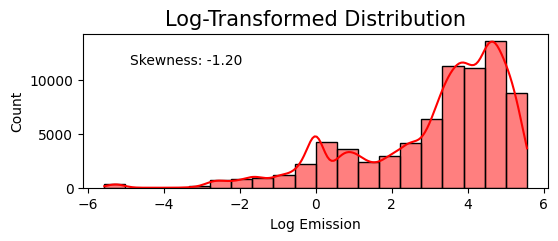

In [107]:
train['Log_emission'] = train["emission"].map(lambda i: np.log(i) if i > 0 else 0)

plt.figure(figsize=(6, 2))

# Plotting the Log-Transformed Distribution
t = sns.histplot(train['Log_emission'], bins=20, kde=True, color='Red')
plt.title("Log-Transformed Distribution", fontsize=15)
plt.xlabel("Log Emission")
log_transformed_skewness = train['Log_emission'].skew()
plt.annotate(f"Skewness: {log_transformed_skewness:.2f}", xy=(0.1, 0.8), xycoords="axes fraction")

plt.show()

**Square Root Transform**

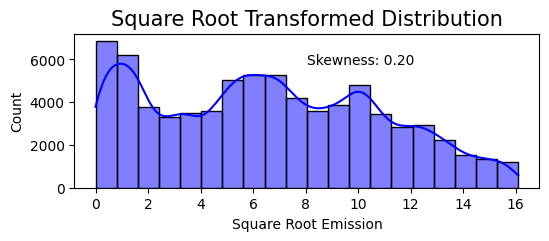

In [106]:
# Perform Square Root Transform
train['sqrt_transformed_emission'] = np.sqrt(train['emission'])

# Plotting the Square Root Transformed Distribution
plt.figure(figsize=(6,2))
sns.histplot(train['sqrt_transformed_emission'], bins=20, kde=True, color='blue')
plt.title("Square Root Transformed Distribution", fontsize=15)
plt.xlabel("Square Root Emission")

# Annotate skewness on the plot
sqrt_transformed_skewness = train['sqrt_transformed_emission'].skew()
plt.annotate(f"Skewness: {sqrt_transformed_skewness:.2f}", xy=(0.5, 0.8), xycoords="axes fraction")

plt.show()


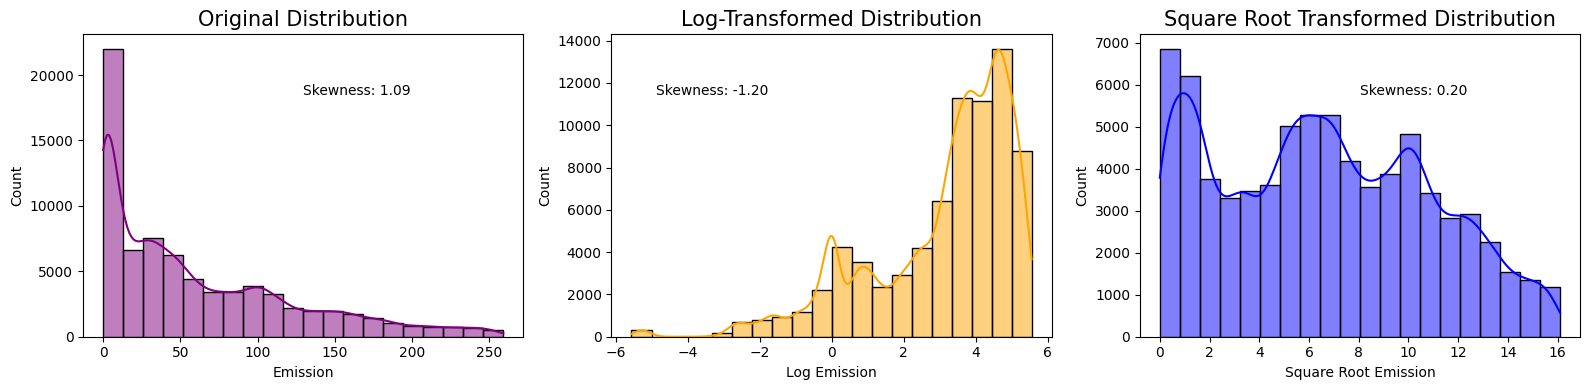

In [69]:
# Original Distribution
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.histplot(train['emission'], bins=20, kde=True, color='purple')
plt.title("Original Distribution", fontsize=15)
plt.xlabel("Emission")
original_skewness = train["emission"].skew()
plt.annotate(f"Skewness: {original_skewness:.2f}", xy=(0.5, 0.8), xycoords="axes fraction")

# Log-Transformed Distribution
plt.subplot(1, 3, 2)
sns.histplot(train['Log_emission'], bins=20, kde=True, color='orange')
plt.title("Log-Transformed Distribution", fontsize=15)
plt.xlabel("Log Emission")
log_transformed_skewness =train['Log_emission'].skew()
plt.annotate(f"Skewness: {log_transformed_skewness:.2f}", xy=(0.1, 0.8), xycoords="axes fraction")

# Square Root Transformed Distribution
plt.subplot(1, 3, 3)
sns.histplot(train['sqrt_transformed_emission'], bins=20, kde=True, color='blue')
plt.title("Square Root Transformed Distribution", fontsize=15)
plt.xlabel("Square Root Emission")
sqrt_transformed_skewness = train['sqrt_transformed_emission'].skew()
plt.annotate(f"Skewness: {sqrt_transformed_skewness:.2f}", xy=(0.5, 0.8), xycoords="axes fraction")

plt.tight_layout()
plt.show()


**Original Distribution:** The first graph shows the original distribution of emission data. It is positively skewed with a skewness value of 1.09. The x-axis represents “Emission” ranging from 0 to 250, and the y-axis represents “Density” ranging from 0 to 0.016.

**Log-Transformed Distribution:** The second graph illustrates the log-transformed distribution of the data. It appears more normalized but still slightly skewed to the left, with a skewness value of -1.20. The x-axis represents “Log Emission” ranging from -6 to 6, and the y-axis represents “Count,” ranging from 0 to about 15000.

**Square Root Transformed Distribution:** The third graph depicts the square root transformed distribution of the data. This distribution looks almost symmetrical with a very low skewness value of 0.20, indicating it’s nearly normal. The x-axis is labeled as “Square Root Emission” and ranges from approximately 0 to around 16. Similar to the second graph, the y-axis denotes “Count,” but here it ranges up till about 10000.

#**Feature Engineering:**


**MONTHLY EMISSION OVER YEARS**

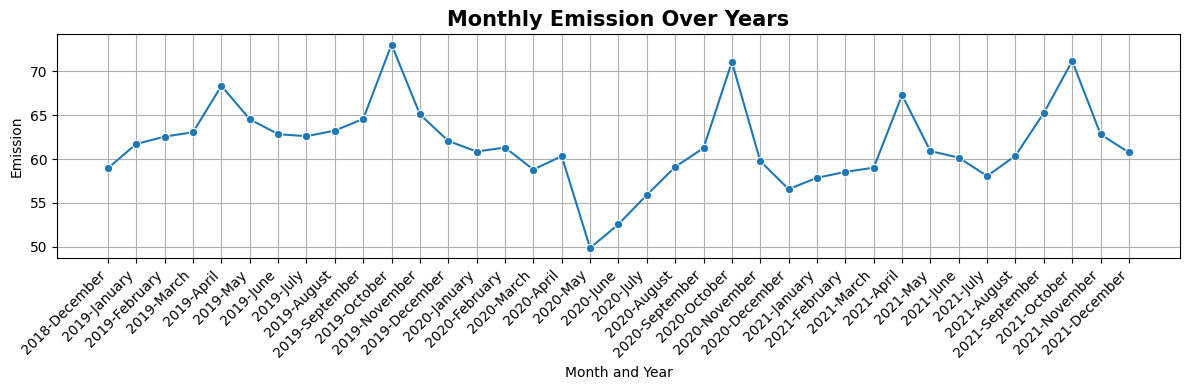

In [108]:
# Extract month name and year from the 'date' column
train['year_month'] = train['date'].dt.strftime('%Y-%B')

# Plotting
plt.figure(figsize=(12,4))
sns.lineplot(x='year_month', y='emission', data=train, marker='o',ci=None, sort=False)
plt.title('Monthly Emission Over Years',fontsize = 15, fontweight = 'bold')
plt.xlabel('Month and Year')
plt.ylabel('Emission')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()

**Data Points and Trends:** The blue dots represent the emission values for each month. The line connecting these dots shows the trend in emission values over time. There are noticeable peaks and troughs, indicating significant variations in emission levels throughout the years.

**Interpretation:** The line graph shows that emission values fluctuated significantly over the years from December 2018 to December 2021. There were periods of high emissions and periods of low emissions. This information could be useful for identifying patterns or trends in the data, which could in turn inform strategies for reducing emissions.

According to the WHO’s recommendations,
Rwanda implemented a national response
preparedness plan against COVID-19 beginning
in March 2020.The Rwandan government officially commenced a lockdown on 22nd March 2020 and partially lifted it in phases beginning on 4th May 2020

**Officical Source:**
https://rbc.gov.rw/publichealthbulletin/img/rphb_issues/98cad8036405f58a7c6c74906cb4a73f1595001168.pdf

#**Machine Learning Models Selection:**

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import RandomizedSearchCV


**Data Splitting:**

In [75]:
df_train =train[['latitude', 'longitude', 'year', 'week_no', 'sqrt_transformed_emission']]
df_train.head()

,latitude,longitude,year,week_no,sqrt_transformed_emission
0,-0.51,29.29,2019,0,1.936748
1,-0.51,29.29,2019,1,2.006284
2,-0.51,29.29,2019,2,2.057032
3,-0.51,29.29,2019,3,2.074918
4,-0.51,29.29,2019,4,2.085022


In [76]:
# Split the dataset into features (X) and target (y)
X = df_train.drop(columns=['sqrt_transformed_emission'])
y = df_train['sqrt_transformed_emission']

In [77]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [78]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression**

In [79]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
r2 = r2_score(y_test, linear_pred)
linear_rmse = linear_mse ** 0.5
print("Linear Regression RMSE:", linear_rmse)
print("R-squared:", r2)

Linear Regression RMSE: 4.099781875787298
R-squared: 0.07111067682647543


Employed various hyperparameter configurations in an attempt to optimize the model's performance. however, the outcomes remained largely consistent across different settings.

**Decision Tree**

In [80]:
# Decision Trees
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
r2 = r2_score(y_test, tree_pred)
tree_rmse = tree_mse ** 0.5
print("Decision Trees RMSE:", tree_rmse)
print("R-squared:", r2)

Decision Trees RMSE: 0.3674218301109237
R-squared: 0.9925394236237197


In [81]:
# Specify a new parameter grid
new_param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the Decision Tree model
decision_tree_model = DecisionTreeRegressor()

# Perform randomized search with the new parameter grid
random_search_tree = RandomizedSearchCV(
    decision_tree_model,
    param_distributions=new_param_grid,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_tree.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters for Decision Tree:", random_search_tree.best_params_)



Best Hyperparameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15}


In [82]:
# Best hyperparameters from the randomized search
best_hyperparameters = {
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 15
}

# Create the Decision Tree model with the best hyperparameters
best_decision_tree_model = DecisionTreeRegressor(**best_hyperparameters, random_state=42)

# Fit the model to the training data
best_decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
decision_tree_pred = best_decision_tree_model.predict(X_test)

# Evaluate the model
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
decision_tree_rmse = decision_tree_mse ** 0.5
r2_decision_tree = r2_score(y_test, decision_tree_pred)

# Print the results
print("Best Decision Tree RMSE:", decision_tree_rmse)
print("R-squared (Best Decision Tree):", r2_decision_tree)


Best Decision Tree RMSE: 1.766124569996646
R-squared (Best Decision Tree): 0.827620691797228


**Random Forest**

In [83]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, rf_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = rf_mse ** 0.5
print("Random Forest RMSE:", rf_rmse)
print("R-squared:", r2)

Random Forest RMSE: 0.3066023031028803
R-squared: 0.9948049073850818


In [84]:
# Specify the parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5,10],
    'min_samples_split': [2, 5]
}

# Create the Random Forest model
random_forest_model = RandomForestRegressor()

# Perform randomized search
random_search = RandomizedSearchCV(random_forest_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 10}


In [88]:
# Adjust these hyperparameters as needed
n_estimators = 150
max_depth = 10
min_samples_split = 2

# Create the Random Forest model with specified hyperparameters
tuned_random_forest_model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    random_state=42  # Set a random seed for reproducibility
)

# Fit the model to the training data
tuned_random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
tuned_random_forest_pred = tuned_random_forest_model.predict(X_test)

# Evaluate the model
tuned_random_forest_mse = mean_squared_error(y_test, tuned_random_forest_pred)
tuned_random_forest_rmse = tuned_random_forest_mse ** 0.5
r2_tuned_random_forest = r2_score(y_test, tuned_random_forest_pred)

# Print the results
print("Tuned Random Forest RMSE:", tuned_random_forest_rmse)
print("R-squared (Tuned Random Forest):", r2_tuned_random_forest)


Tuned Random Forest RMSE: 1.5992133748558037
R-squared (Tuned Random Forest): 0.858663186651433


In [85]:
# Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
gbm_pred = gbm_model.predict(X_test)
r2 = r2_score(y_test, gbm_pred)

gbm_mse = mean_squared_error(y_test, gbm_pred)
gbm_rmse = gbm_mse ** 0.5
print("GBM RMSE:", gbm_rmse)
print("R-squared:", r2)

GBM RMSE: 2.526006705363356
R-squared: 0.647376325394177


In [86]:
# Specify the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

# Create the GBM model
gbm_model = GradientBoostingRegressor()

# Perform randomized search
random_search_gbm = RandomizedSearchCV(
    gbm_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
random_search_gbm.fit(X_train, y_train)

# Print the best parameters
print("Best Hyperparameters for GBM:", random_search_gbm.best_params_)

Best Hyperparameters for GBM: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 5}


In [89]:
# Best hyperparameters from the randomized search
best_hyperparameters = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'max_depth': 5
}

# Create the GBM model with the best hyperparameters
best_gbm_model = GradientBoostingRegressor(**best_hyperparameters, random_state=42)

# Fit the model to the training data
best_gbm_model.fit(X_train, y_train)

# Make predictions on the test data
gbm_pred = best_gbm_model.predict(X_test)

# Evaluate the model
gbm_mse = mean_squared_error(y_test, gbm_pred)
gbm_rmse = gbm_mse ** 0.5
r2_gbm = r2_score(y_test, gbm_pred)

# Print the results
print("Best GBM RMSE:", gbm_rmse)
print("R-squared (Best GBM):", r2_gbm)


Best GBM RMSE: 1.6295264374451177
R-squared (Best GBM): 0.8532543317180261


In [90]:
# converting all RSME error values of different machine learning model into a DataFrame

Errors = [linear_rmse,decision_tree_rmse,tuned_random_forest_rmse,gbm_rmse]
dataPerf = pd.DataFrame(data={'Model': ['LinearRegression', 'Decision Trees', 'Random Forest','Gradient Boosting Machines (GBM)' ], 'Error': Errors})
Erro_desc = dataPerf.sort_values(by='Error', ascending=True).reset_index(drop=True)
print(Erro_desc)

                              Model     Error
0                     Random Forest  1.599213
1  Gradient Boosting Machines (GBM)  1.629526
2                    Decision Trees  1.766125
3                  LinearRegression  4.099782


**Plotting the Performance analysis of different classifiers**

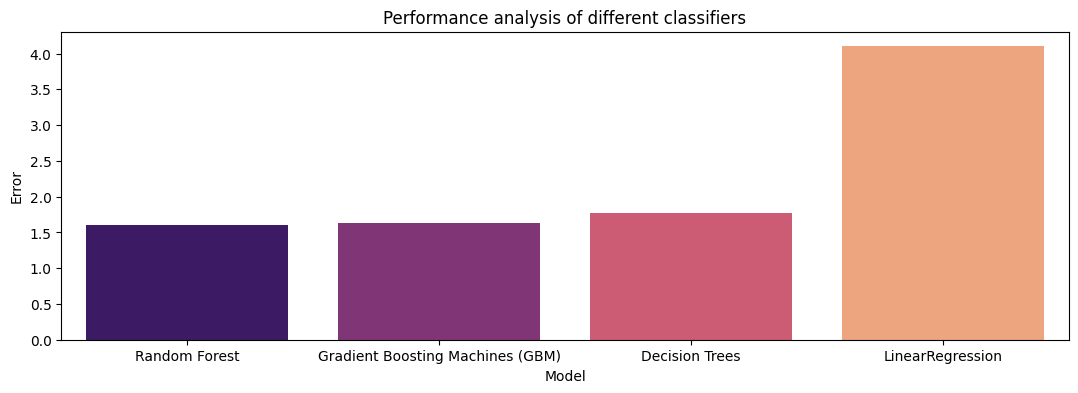

In [91]:
plt.figure(figsize=(13,4))
sns.barplot(x="Model", y="Error", data=Erro_desc, palette="magma")
plt.title('Performance analysis of different classifiers')
plt.show()

In [92]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.561522,829937.000000,-100.113785,33.696957,-133.047562,33.779572,0.112175,2.374888,0.269846,227.193100,0.485340,-100.113785,33.696957,-133.047562,33.779572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.485129,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,-140.529848,28.896124,0.000157,0.037641,1688.656342,2814.309683,829652.957598,26.072167,25.189549,-142.612636,28.318923,0.000048,1.117653e-05,0.000037,0.000093,7311.869141,-1.416309,0.036769,829736.125000,76.239196,15.600607,-140.529848,28.896124,0.000123,0.957096,0.000058,0.000000,28.896124,-140.529848,15.600607,76.239196,-0.823662,829753.051343,-0.009998,34.745542,-139.171039,30.405075,0.112643,2.537305,0.290184,228.489219,0.515679,-0.009998,34.745542,-139.171039,30.405075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711262,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,-136.908976,30.054682,0.000053,0.037795,2629.692089,3233.654973,829589.971617,14.881259,40.833582,-143.949340,26.760219,0.000055,1.679787e-05,0.000038,0.000109,8

In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      24353 non-null  object 
 1   latitude                                                  24353 non-null  float64
 2   longitude                                                 24353 non-null  float64
 3   year                                                      24353 non-null  int64  
 4   week_no                                                   24353 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 8   SulphurDioxide_c

In [94]:
test_missing_value_percentage = (test.isnull().sum() / len(test))*100
test_missing_value_percentage.sort_values(ascending=False)

UvAerosolLayerHeight_aerosol_pressure                       91.405576
UvAerosolLayerHeight_aerosol_optical_depth                  91.405576
UvAerosolLayerHeight_sensor_zenith_angle                    91.405576
UvAerosolLayerHeight_sensor_azimuth_angle                   91.405576
UvAerosolLayerHeight_aerosol_height                         91.405576
UvAerosolLayerHeight_solar_zenith_angle                     91.405576
UvAerosolLayerHeight_solar_azimuth_angle                    91.405576
SulphurDioxide_sensor_zenith_angle                          25.220712
SulphurDioxide_SO2_column_number_density_15km               25.220712
SulphurDioxide_solar_azimuth_angle                          25.220712
SulphurDioxide_solar_zenith_angle                           25.220712
SulphurDioxide_sensor_azimuth_angle                         25.220712
SulphurDioxide_cloud_fraction                               25.220712
SulphurDioxide_SO2_slant_column_number_density              25.220712
SulphurDioxide_SO2_c

In [95]:
from sklearn.impute import KNNImputer

In [96]:
from sklearn.impute import KNNImputer

# Select columns to impute using KNN
test_columns_to_knn = test_missing_value_percentage[(test_missing_value_percentage > 10) & (test_missing_value_percentage < 60)].index

# KNN Imputation for selected columns
Knn_impu = KNNImputer(n_neighbors=5)
test[test_columns_to_knn] = Knn_impu.fit_transform(test[test_columns_to_knn])

# Now you can use the 'columns_to_knn' variable if needed
print(test_columns_to_knn)

Index(['SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slant_column_number_density',
       'NitrogenDioxide_tropopause_pressure',
       'NitrogenDioxide_absorbing_aerosol_index',
       'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude',
       'NitrogenDioxide_sensor_azimuth_angle',
       'NitrogenDioxide_sensor_zenith_angle',
       'NitrogenDioxide_solar_azimuth_angle',
       'Nitrogen

In [97]:
# Dropping those column having missing value percentage greater than 60%
test_columns_to_drop = test_missing_value_percentage[test_missing_value_percentage > 60].index
test = test.drop(columns=test_columns_to_drop)

In [98]:
test_columns_to_mean = test_missing_value_percentage[(test_missing_value_percentage < 10) & (test_missing_value_percentage > 0)].index
test_columns_mean = test[test_columns_to_mean].mean()
test[test_columns_to_mean] = test[test_columns_to_mean].fillna(test_columns_mean)

In [99]:
test.isnull().sum()

ID_LAT_LON_YEAR_WEEK                                        0
latitude                                                    0
longitude                                                   0
year                                                        0
week_no                                                     0
SulphurDioxide_SO2_column_number_density                    0
SulphurDioxide_SO2_column_number_density_amf                0
SulphurDioxide_SO2_slant_column_number_density              0
SulphurDioxide_cloud_fraction                               0
SulphurDioxide_sensor_azimuth_angle                         0
SulphurDioxide_sensor_zenith_angle                          0
SulphurDioxide_solar_azimuth_angle                          0
SulphurDioxide_solar_zenith_angle                           0
SulphurDioxide_SO2_column_number_density_15km               0
CarbonMonoxide_CO_column_number_density                     0
CarbonMonoxide_H2O_column_number_density                    0
CarbonMo

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [101]:
df_test = test[['latitude', 'longitude', 'year', 'week_no']]

In [102]:
#Scaling
df_test = scaler.fit_transform(df_test)

In [103]:
#Predict
y_pred = tuned_random_forest_model.predict(df_test)

In [104]:
output = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test.ID_LAT_LON_YEAR_WEEK, 'emission': y_pred})
output.to_csv('submission88.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
